<h2> Imports </h2>

In [2]:
import nltk
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk import sent_tokenize,word_tokenize
from nltk import FreqDist
from wordcloud import WordCloud, STOPWORDS

<h2>Cleaning function </h2>

In [3]:
#must be a string in entry

def cleaning(var):    
    plain_string = ""
    for x in var:
        x.lower()
        if (( 'a' <= x and x <= 'z') or x == ' '):
            plain_string += x
        elif x == '\'': #we replace the ' by a space 
            plain_string += ' '
    return plain_string 

In [4]:
#cleaning(df['text'][0])   possible to try after running next cells

<h2>Reading of the file and pre-processing</h2>

So we get here a dataframe with each column corresponding to 'id', 'text', 'author'

In [5]:
df = pd.read_csv("data/train.csv")
author_list = ['EAP', 'HPL', 'MWS']
df.text= df.text.astype(str)
df.author = pd.Categorical(df.author)


In [14]:
print(df.iloc[1]['text'])

It never once occurred to me that the fumbling might be a mere mistake.


In [17]:
#these are the full text from the authors in array
eap = df[df.author=="EAP"]["text"].values
hpl = df[df.author=="HPL"]["text"].values
mws = df[df.author=="MWS"]["text"].values

#these are the full text from the authors in string containing all the lines of an author
eap_s = " ".join(eap)
hpl_s = " ".join(hpl)
mws_s = " ".join(mws)

#these are the full PLAIN (without capital and ponctuation) text from the authors in string containing all the lines of an author

eap_s_c = cleaning(eap_s)
hpl_s_c = cleaning(hpl_s)
mws_s_c = cleaning(mws_s)



In [18]:

#this cell is just for coding and testing the functions

test = df['text'][0]
test2 = df['text'][39] #with "blabla"
test3 = df['text'][70] #with 2 times "blabla"
#df = df[:1000] #size reduction for coding

<h2>World Cloud </h2>

These are the world cloud for each author. First we create a string per author with all its worlds.<br>
we can also make some more vizual worldcloud with picture instead of square. <br>
https://github.com/amueller/word_cloud

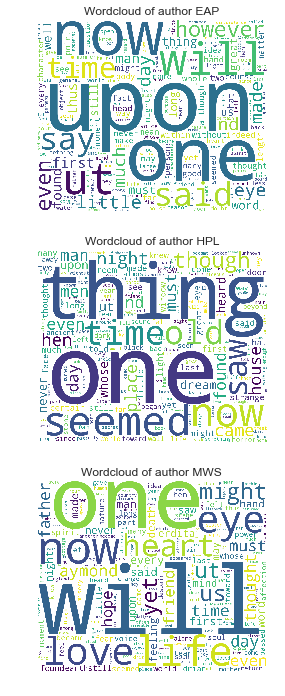

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(12,12))
full_texts = [eap_s_c, hpl_s_c, mws_s_c]

for i in range(3):
    plt.subplot(3, 1, i+1)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000).generate(full_texts[i])
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Wordcloud of author ' + author_list[i])

plt.show()

<h2>Basic Understanding of the data set</h2>

<h3>Counting the number of text by author</h3>

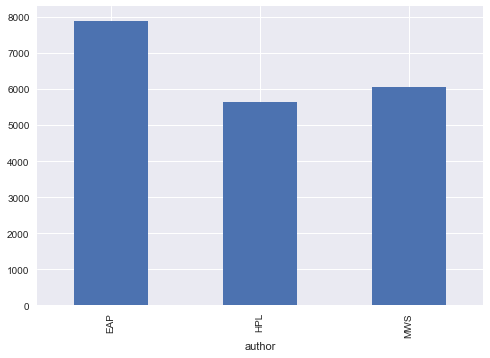

In [20]:
%matplotlib inline
plt.style.use('seaborn')
a = df.groupby('author').size()
a.plot.bar()

<h3>Counting the number of character by author</h3>


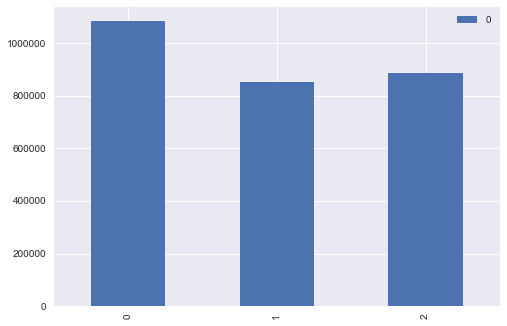

In [21]:
plt.style.use('seaborn')
a = pd.DataFrame([len(eap_s_c), len(hpl_s_c), len(mws_s_c)])

a.plot.bar()

<h3>Most used word distribution among all the author (TOP 50) </h3>

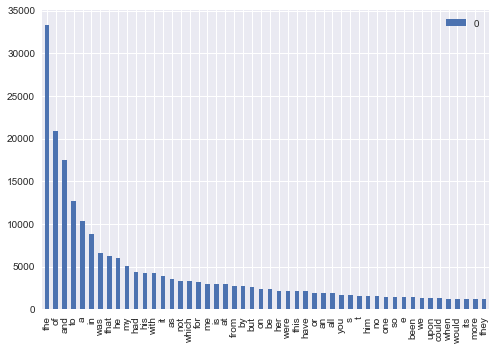

In [22]:

def plot_freq_word(var, n):
    var = nltk.Text(word_tokenize(var)) #we token the words
    plt.style.use('seaborn')
    fdist = FreqDist(var)
    fdist = fdist.most_common(n)
    list_index = [fdist[x][0] for x in range(len(fdist))]
    list_value = pd.DataFrame([fdist[x][1] for x in range(len(fdist))], index = list_index)
    list_value.plot.bar() 


all_cleaned_text = eap_s_c + ' ' + hpl_s_c + ' ' + mws_s_c
plot_freq_word(all_cleaned_text, 50)


<h3>Most used word distribution <u>(without the stopwords)</u> among all the author (TOP N) </h3>

In [23]:
N = 50
def remove_stopword(var): #take a string, return a string
    var = nltk.Text(word_tokenize(var))
    
    l = [word for word in var if not word in wordcloud.stopwords]
    res = ""
    for word in l:
        res += word + ' '
    return res
        
print(test)
remove_stopword(test)    
    

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.


'This process , however , afforded means ascertaining dimensions dungeon ; I might make circuit , return point whence I set , without aware fact ; perfectly uniform seemed wall . '

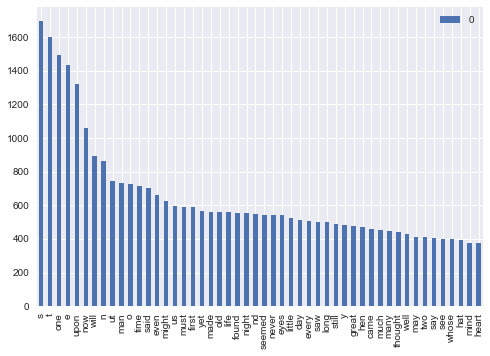

In [24]:
plot_freq_word(remove_stopword(all_cleaned_text), N)


It's better but we still have some non-important word such as the 1-caractere word. Let's remove them.

<h3>Most used word distribution <u>(without the stopwords + small words (less than U-character)</u> among all the author (TOP N) </h3>

In [25]:
N = 50
U = 4
def remove_small(var, u):#take a string, return a string
    var = nltk.Text(word_tokenize(var))
    l = [word for word in var if len(word)>=u]
    res = ""
    for word in l:
        res += word + ' '
    return res 
remove_small(test, U)

'This process however afforded means ascertaining dimensions dungeon might make circuit return point whence without being aware fact perfectly uniform seemed wall '

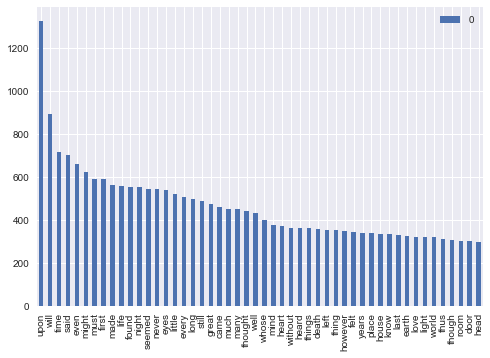

In [26]:
def final_plot(var, n, u):
    plot_freq_word(remove_stopword(remove_small(var, u)), n)
    
final_plot(all_cleaned_text,N, U)


Now we have a better representation of most used words.

<h3>Most used word distribution <u>(without the stopwords + small words (less than U-character)</u> per author (TOP N) </h3>

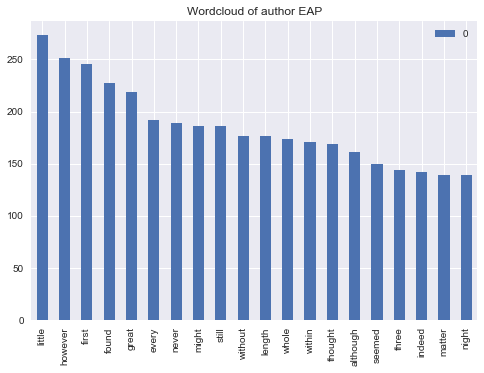

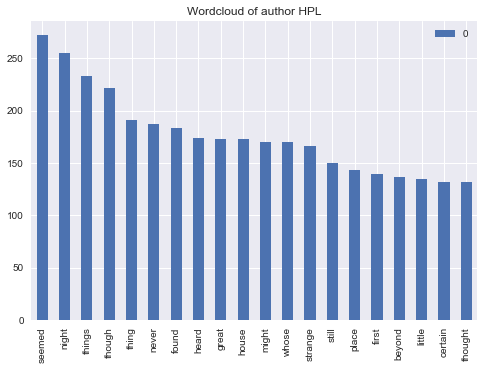

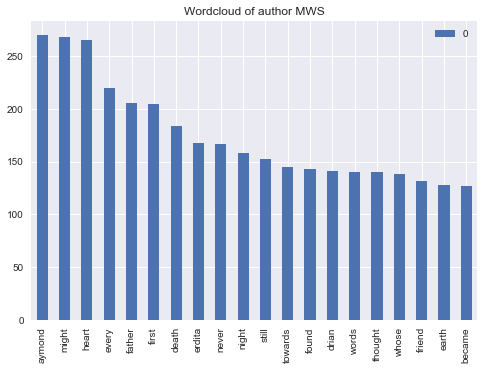

In [27]:
N = 20
U = 5
for i in range(3):
    final_plot(full_texts[i] ,N, U)
    plt.title('Wordcloud of author ' + author_list[i])

plt.show()

So authors have differents long favorite words. We can use this information.

<h3>Word lenght distribution among all the authors</h3>

It's a good indicator of the complexity of a text.

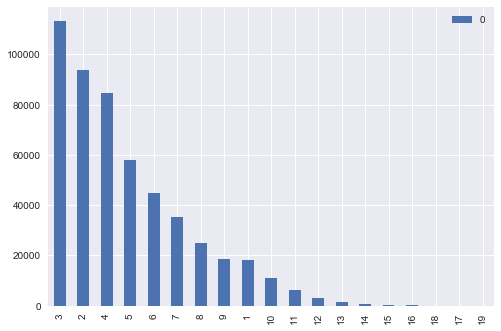

In [28]:
def lenght_distri(var):
    var = nltk.Text(word_tokenize(var))
    plt.style.use('seaborn')
    l = [len(word) for word in var]
    fdist = FreqDist(l)
    fdist = fdist.most_common(100)
    list_index = [fdist[x][0] for x in range(len(fdist))]
    list_value = pd.DataFrame([fdist[x][1] for x in range(len(fdist))], index = list_index)
    list_value.plot.bar() 
   
lenght_distri(all_cleaned_text)



<h3>Word lenght distribution per author</h3>

Let's detail per author

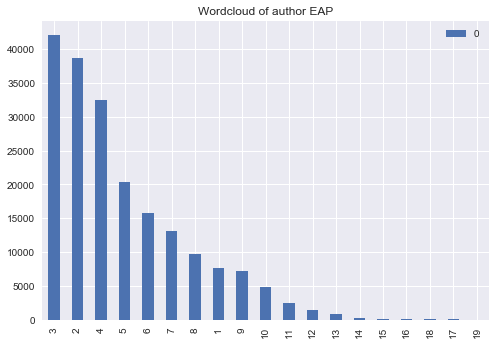

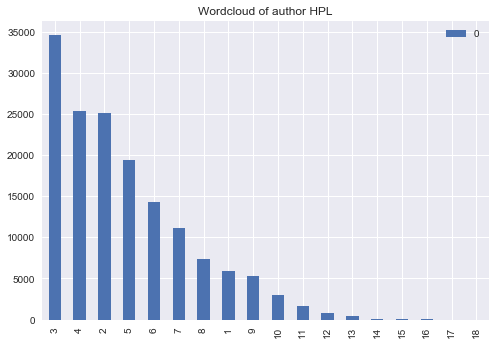

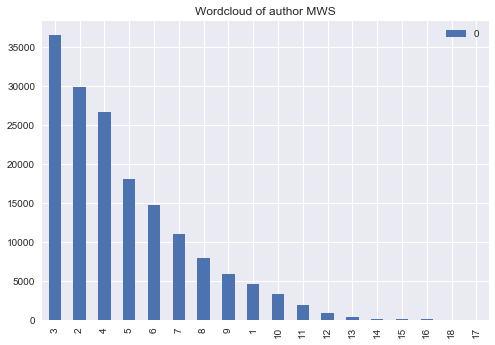

In [29]:
for i in range(3):
    lenght_distri(full_texts[i])
    plt.title('Wordcloud of author ' + author_list[i])

plt.show()

Interpretation (TBD)

Remark: Maybe we can observe the log... (TBD)

So, we get information about all the corpus. Now let's observe deeply each line.

<h2>Exploration by line</h2>

Now, let's look some metrics line by line. Our problem is that is our dataset, line's lenght is different. Therefore, we need to normalize our metrics. <br>
There exist different methodology to normalize. I don't know for now wich one is better. <br>
For now, we decide to normalize by divide by the number of word <u>(in the sense that a punctuation is also counted as a word)</u> in the line. <br>
I think we should deeper think about the normalization function. Maybe it would be relevant to choose different function following the metric we explore. For instance, including or not the punctuations, I don't know but I think it's important to get the better metrics in order to get the better forecasts. (TBD)

<h3>Normalizing function</h3>


The idea of normalization came later so for most of subparts, you can see unnormalized and normalized plots. <br>
I think we should keep an example to show how normalization affects the interpretation.

In [30]:
def norma(var):
    words = nltk.Text(word_tokenize(var))
    return len(words)
norma(test)    


#maybe we need other normalizing functions. 

48

<h3>Distribution of the lenght of texts per line</h3>
Don't think we need to normalize

In [31]:
def length(var):#takes string, return int
    return len(var)

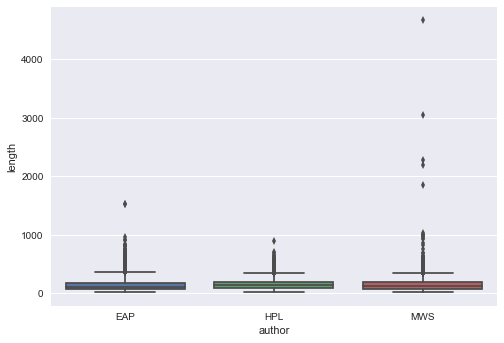

In [32]:
df['length'] = df.text.apply(length)
sns.boxplot(x = 'author',y = 'length',data = df)


Interpretation (TBD)

<h3>Distribution of the number of sentence per line</h3>
Don't think we need to normaized.


In [33]:
def num_sent(var):
    sentences = nltk.Text(sent_tokenize(var))
    return len(sentences)

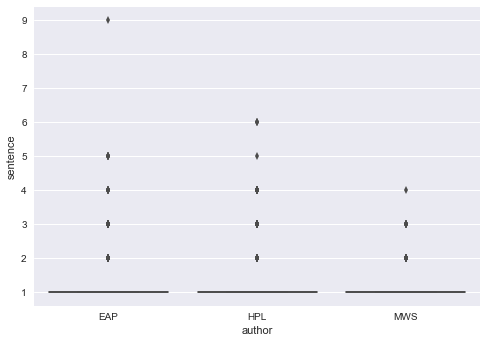

In [34]:
df['sentence'] = df.text.apply(num_sent)
sns.boxplot(x = 'author',y = 'sentence',data = df)

Interpretation (TBD) MWS doesn't write line with 4 sentences.

Remark: I don't think these two are relevant metrics. I means the lenght of the quotation does not depend on the author (as I understand) but it depends on the guy who splited the text books....

<h3>Distribution of the number of word per line</h3>


In [35]:
def num_words(var):
    words = nltk.Text(word_tokenize(cleaning(var)))
    return len(words)

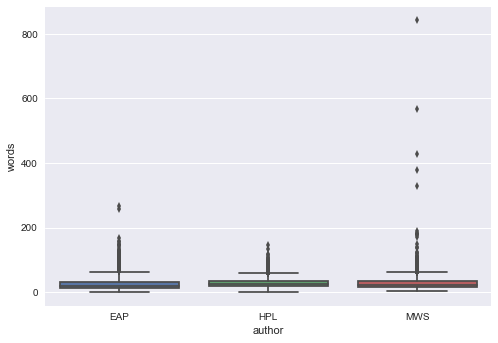

In [36]:
df['words'] = df.text.apply(num_words)
sns.boxplot(x = 'author',y = 'words',data = df)

Interpretation (TBD) variance of mws is the biggest. but in mean it's hpl the biggest

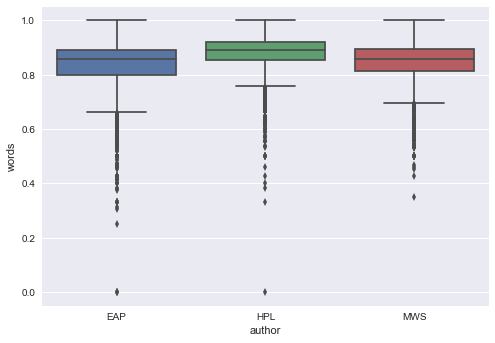

In [37]:
df['words'] = df.text.apply(num_words)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'words',data = df)

Normalization changes the interpretation. Actually, HPL use more word than the other in ratio. It means he use less punctuations.

<h3>Distribution of the number of punctution per line</h3>


In [38]:
def num_punc(var):#take a string, return an integer
    cpunc = 0
    for x in var:
        if x in string.punctuation:
            cpunc +=1
    return cpunc
num_punc(test)

7

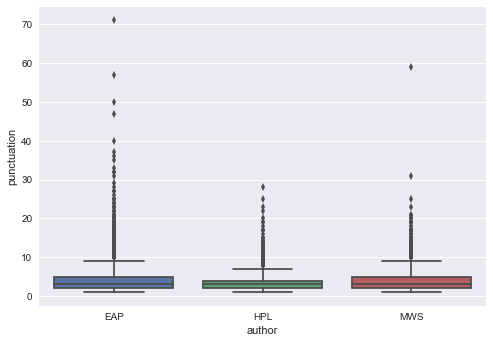

In [39]:
df['punctuation'] = df.text.apply(num_punc)
sns.boxplot(x = 'author',y = 'punctuation',data = df)

Inter (TBD)

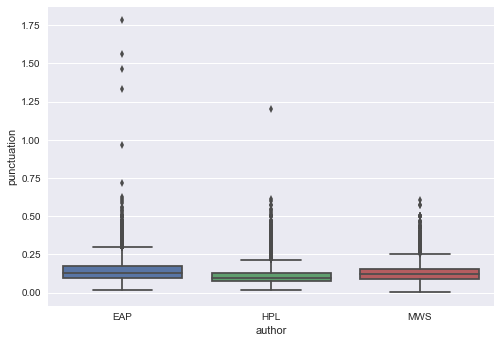

In [40]:
df['punctuation'] = df.text.apply(num_punc)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'punctuation',data = df)

We can see that it's true that HPL use less punctuation. <br>
It would be interesting to look at the ratios of , ; . : ! ? ( [ but I am a bit tired so for a next time. 

<h3>Distribution of the number of dialogue per line</h3>
We can see that some lines contains dialogues and other no. Each dialogue start with "  so let's count the number of "

But we have a problem:<br>
Some lines (test2 for example) are well done, it means that the final dialogue will end with "<br>
Some lines (test3 for example) are <u>not</u> well done, it means that the final dialogue will <u>not</u> end with "<br>

So we use a little trick.

In [41]:
def num_dial(var):#take a string, return an integer
    cdial = 0
    for x in var:
        if x == '"':
            cdial +=1
    if cdial%2 == 0: 
        res = cdial/2
        res = int(res)
    else: 
        res =  cdial/2 + 0.5
        res = int(res)
    return res

num_dial(test3)


2

In [42]:
print(test2)
print("")
print(num_dial(test2))
print("")
print(test3)
print("")
print(num_dial(test3))


"The present peculiar condition of affairs at court, and especially of those intrigues in which D is known to be involved, would render the instant availability of the document its susceptibility of being produced at a moment's notice a point of nearly equal importance with its possession."

1

"And what about the window panes?" "They were all gone.

2


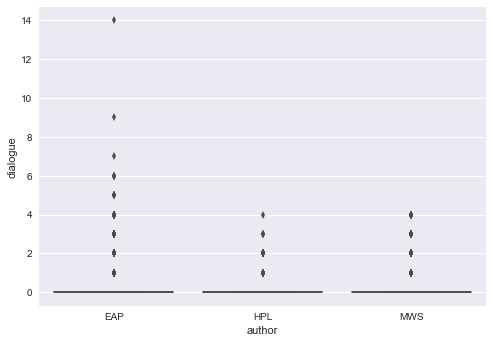

In [43]:
df['dialogue'] = df.text.apply(num_dial)
sns.boxplot(x = 'author',y = 'dialogue',data = df)

HPL seems using less dialogues than others. Let's see the distributions.


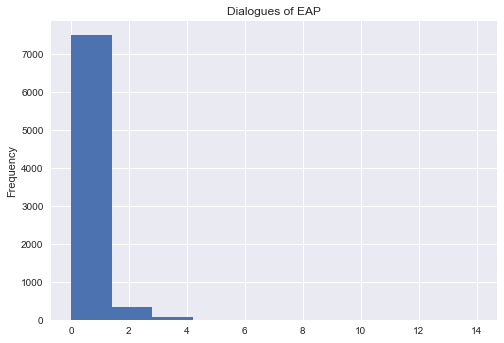

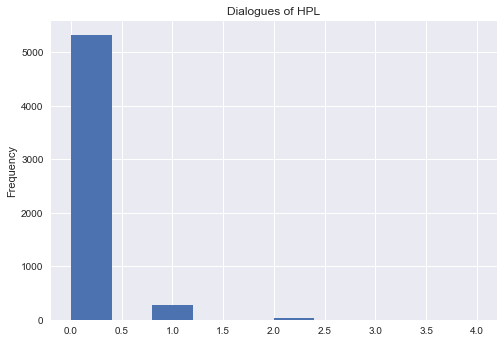

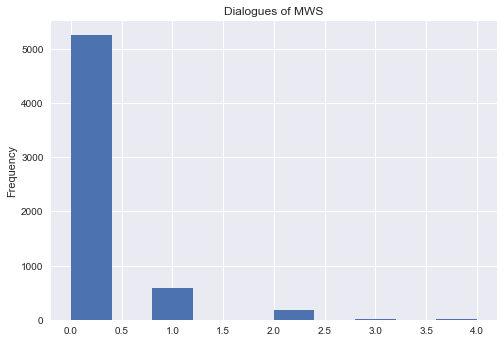

In [44]:



for i in range(3):
    df_ = df[df['author'] == author_list[i]]
    plt.style.use('seaborn')
    #sns.distplot(df_['dialogue'])
    df_['dialogue'].plot.hist()
    plt.title('Dialogues of ' + author_list[i])
    plt.show()


Plot should be improve to get the same scale.
Interpretation (TBD) HPL seems to use really often dialogue.

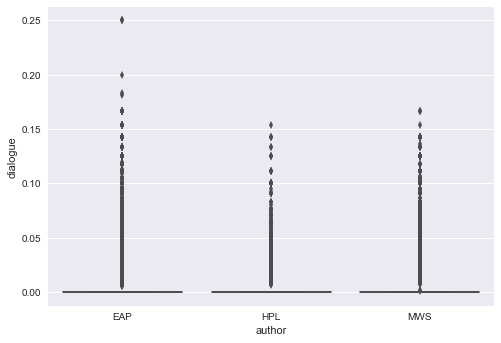

In [45]:
df['dialogue'] = df.text.apply(num_dial)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'dialogue',data = df)

Interpretation (TBD)

<h3>Counting the number of Stop Words by line </h3> 

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [46]:
def num_stopword(var):#take a string, return an integer
    cs = 0
    #var = nltk.Text(word_tokenize(cleaning(var)))
    var = nltk.Text(word_tokenize(cleaning(var)))
    for x in var:
        if x in wordcloud.stopwords:
            cs +=1
    return cs

num_stopword(test)

18

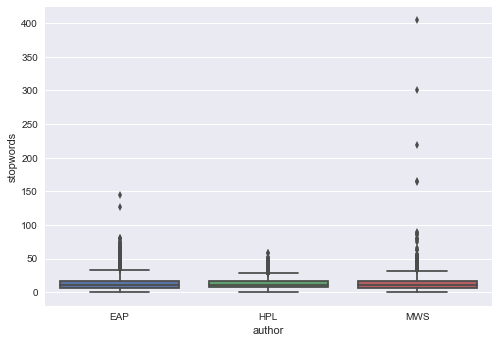

In [47]:
df['stopwords'] = df.text.apply(num_stopword)
sns.boxplot(x = 'author',y = 'stopwords',data = df)

EAP seems to use less stopwords

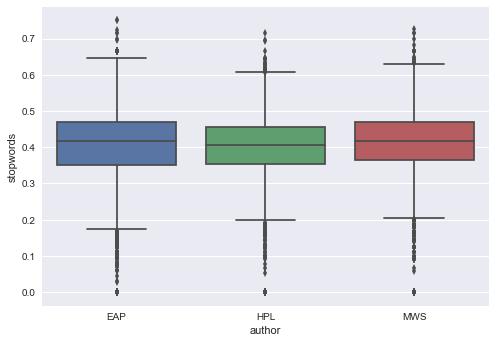

In [48]:
df['stopwords'] = df.text.apply(num_stopword)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'stopwords',data = df)

Interpretation (TBD)

<h3>Vocabulary</h3>
It's the qty of unique words used (more variety, more complexity)<br>
<br>
We need here to improve the normalization. I mean that if you have a many sentence, you are more likely to repeat words. So, if someone has short line, then the ratio of unique word is going to be greater, even if they are not so "fancy" words. 
<br>
Example:  'I am so tired today. I need to drink coffee.' with our metric, so and to are counted as 'fancy' word..


In [49]:
def voc(var):#take string, return int
    vocab = {x.lower() for x in word_tokenize(cleaning(var))}  #here we use cleaning function to avoid counting unique punctution as unique word (if the line is 1 sentence, so it will count the point as a single world...)
    return len(vocab)
voc(test)

34

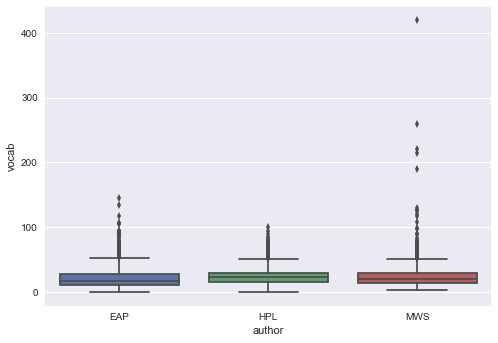

In [50]:
df['vocab'] = df.text.apply(voc)
sns.boxplot(x = 'author',y = 'vocab',data = df)

Interpret (TBD)

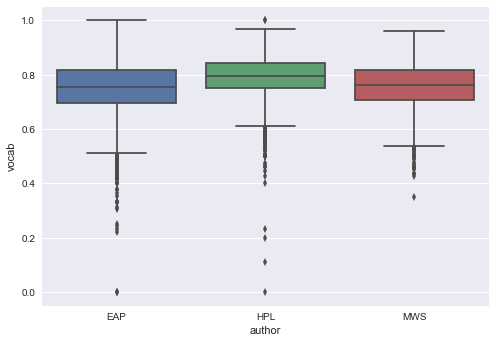

In [51]:
df['vocab'] = df.text.apply(voc)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'vocab',data = df)

inter TBD

<h3>Pos/Neg</h3>

Need to think about it because the lines are too short to be relevant with a simple counter as we saw in class. A possiblity would be to score the positivness/negativness of words. Need to explore... (TBD)

<h3>Counting the single word count by line  </h3> 

I retired the 1-caracter letter because once lowered, they are counted too much. But finally I kept the 1-caracter I because it could reveal informations on wether or not the author use I or he/she in his text. <br>
This was my first idea but I am not sure about it because it creates as many dimension (for the feature vector) as there exist of unique words in our dataset. Here [voc(all_cleaned_text)] features. <br>
<br>
And many of the elements of the feature vector gonna be 0. (each element of this part of the feature vector is going to be the number of times the word is in the line.) ( I think I am not so clear..)

In [52]:
voc(all_cleaned_text) #number of unique words among all the texts

26543

<h3>Counting the single word count by line  (enhanced)</h3> 
Basically, here we can follow the blog article.<br>
https://blog.insightdatascience.com/anomaly-detection-for-writing-styles-bdeb2279a19b <br>
So we create a list of the top N words among all the text of all the authors. <br>
Then we create N feature elements for our feature vector counting the occurence of only the most used words. <br>Therefore, the dimension of the feature vector is really reduced and we gain computing time.

In [53]:
N = 200

def most_freq_word(var, n):#take string, int , return list of tuples
    var = nltk.Text(word_tokenize(var)) #we token the words
    fdist = FreqDist(var)
    fdist = fdist.most_common(n)
    return fdist

list_N_most = most_freq_word(all_cleaned_text, N) 

list_N_most_word = [word[0] for word in list_N_most]

In [54]:
def freq_of_word_W(var, W): #takes string, string, return int
    var = word_tokenize(cleaning(var)) # we keep all the world but not the punctuation
    c = 0 
    for x in var:
        if x == W:
            c += 1 
    return c

for c in list_N_most_word:
    if freq_of_word_W(test, c) != 0:
        print(freq_of_word_W(test, c), ' ', c)
print(test)    
    

4   the
3   of
1   and
1   to
1   my
1   his
1   as
1   me
1   no
1   so
1   its
1   out
1   might
1   seemed
1   being
1   without
1   however
1   make
This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.


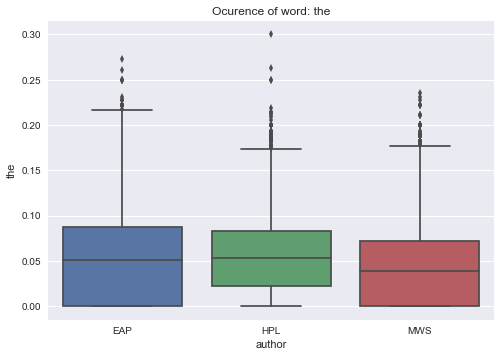

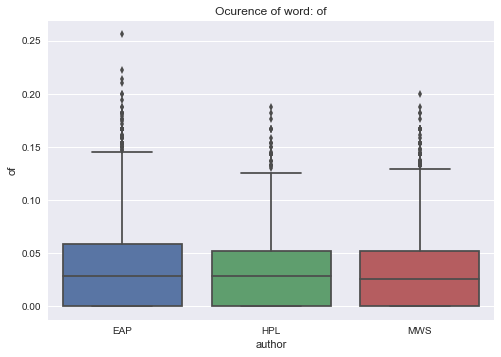

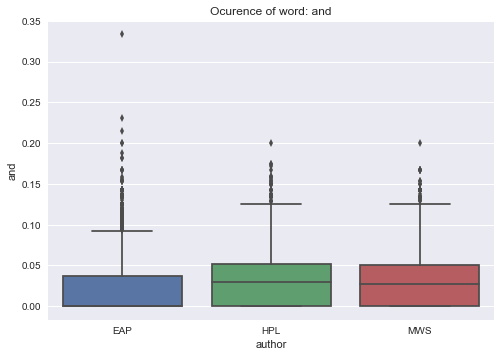

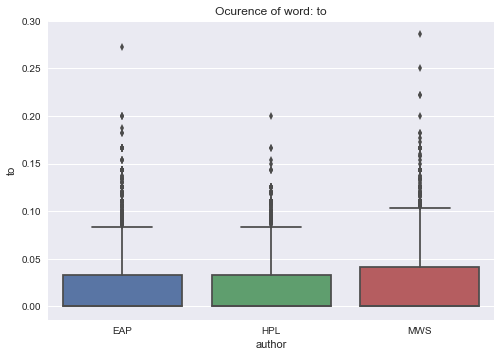

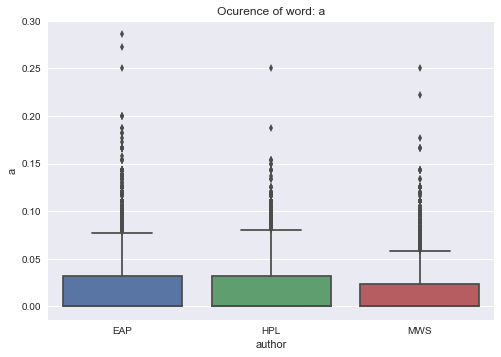

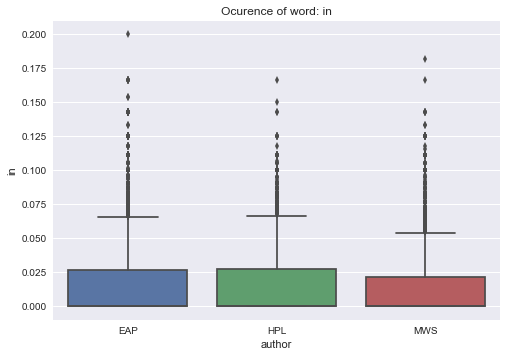

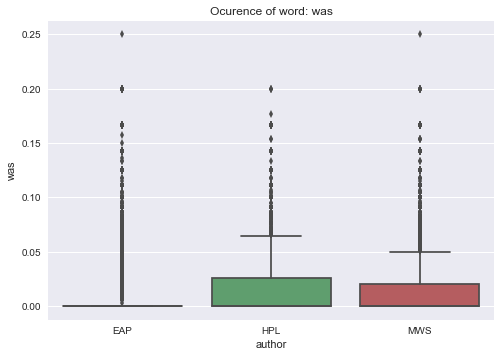

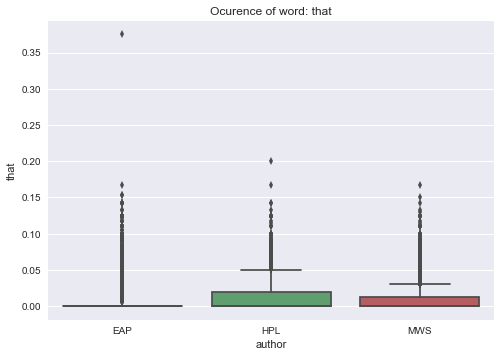

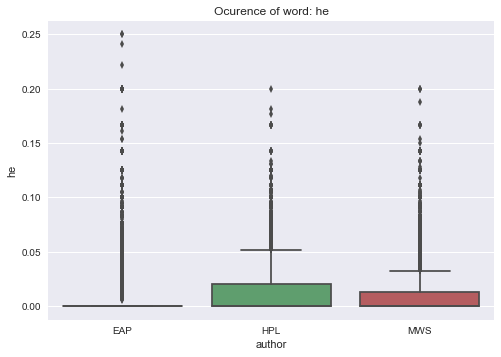

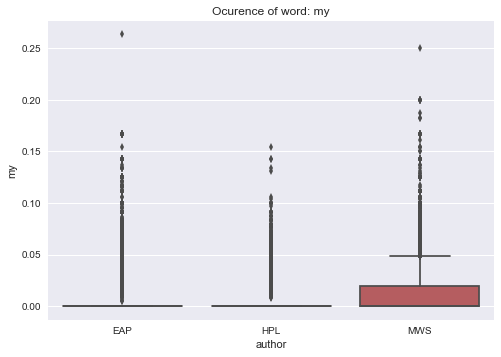

In [55]:
for c in list_N_most_word[0:10]: #we don't print it for all the top-word...
    plt.style.use('seaborn')
    df[c] = np.vectorize(freq_of_word_W)(df.text, c)/df.text.apply(norma)
    sns.boxplot(x = 'author',y = c,data = df)
    plt.title('Ocurence of word: ' + c)
    plt.show()   

#df[x] = np.vectorize(occurance_by_line)(df['text'], x)
#df.text.apply(freq_of_word_W)/df.text.apply(norma)


Interpretation (TBD)

<h3>Counting the number of type by line  </h3> 

http://www.nltk.org/book/ch05.html
    
For that, we will use the tagger as you can see in the link. This will be useful for verbs, adjectivs and nouns. Maybe for more type we need to explore... 

Universal Part-of-Speech Tagset<br><br>
ADJ	adjective	new, good, high, special, big, local <br>
ADP	adposition	on, of, at, with, by, into, under <br>
ADV	adverb	really, already, still, early, now<br>
CONJ	conjunction	and, or, but, if, while, although<br>
DET	determiner, article	the, a, some, most, every, no, which<br>
NOUN	noun	year, home, costs, time, Africa<br>
NUM	numeral	twenty-four, fourth, 1991, 14:24<br>
PRT	particle	at, on, out, over per, that, up, with<br>
PRON	pronoun	he, their, her, its, my, I, us<br>
VERB	verb	is, say, told, given, playing, would<br>
.	punctuation marks	. , ; !<br>
X	other	ersatz, esprit, dunno, gr8, univeristy<br>


<b>Remark</b>: the number of verbs is a good metrics of the complexity of a sentence beause it is a good  measure of how many dependent clauses each sentence had

In [56]:
def create_list(var): #take string, return list, list, list
    l_nou =[]
    l_adj = []
    l_ver = []
    for x in nltk.pos_tag(word_tokenize(var)):
        if len(x[1])>1: #we exclide the punctuations token 
            if x[1][0:2]=='NN': #all the noun tags start with NN
                l_nou.append(x)
            elif x[1][0:2]=='JJ':#all the adjective tags start with JJ
                l_adj.append(x)
            elif x[1][0:2]=='VB':#all the verb tags start with VB
                l_ver.append(x)
    return l_nou, l_adj, l_ver

           
def number_noun(var): #take string, return int
    return len(create_list(var)[0])

def number_adject(var):#take string, return int
    return len(create_list(var)[1])

def number_verb(var):#take string, return int    
    return len(create_list(var)[2])


# I just realized we could use simple counter instead (TBD)

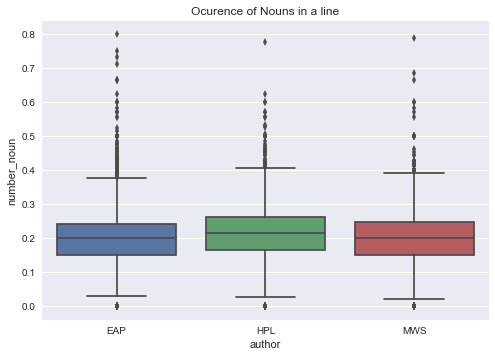

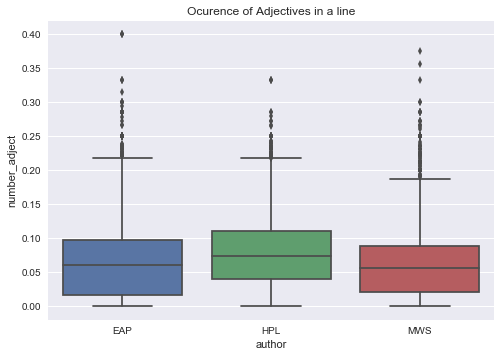

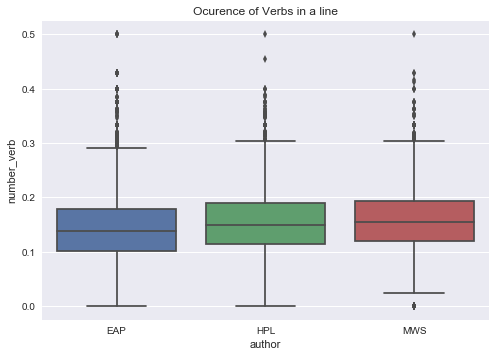

In [57]:

plt.style.use('seaborn')
df['number_noun'] = df.text.apply(number_noun)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'number_noun',data = df)
plt.title('Ocurence of Nouns in a line')
plt.show() 

plt.style.use('seaborn')
df['number_adject'] = df.text.apply(number_adject)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'number_adject',data = df)
plt.title('Ocurence of Adjectives in a line')
plt.show()


plt.style.use('seaborn')
df['number_verb'] = df.text.apply(number_verb)/df.text.apply(norma)
sns.boxplot(x = 'author',y = 'number_verb',data = df)
plt.title('Ocurence of Verbs in a line')
plt.show()

Interpretation (TBD)

<h2> Feature vector </h2>


<h3> Feature choose</h3>

Now we can choose which feature we will to build the feature vector. 

feature_functions = [length, num_sent, num_words, num_punc, num_dial, num_stopword, voc, number_noun, number_adject, number_verb] <br>
length <br>
num_sent <br>
num_words <br>
num_punc<br>
num_dial<br>
num_stopword<br>
voc<br>
number_noun<br>
number_adject<br>
number_verb<br>
<br>
<u>and:</u> <br>
<br>
list_N_most_word<br> we will do the N_most word in a second time because of the forme of the function (2 variables)

<h3>Splitting the training set.</h3>
<br>
Because we have only two dataset, one for training and the other for the Kaggle test. We need to split our 'training' set (called t0) into training (called tr1) (in the sense of the training of our predictive model) and testing set (called ts1) ( in the sense of testing our models, and not be tested by Kaggle ! ). <br>
<br>
We shall notice that the list of most used world will be established thanks to all the training set we have (TR1 + TS1). And then after we do the splitting. 

In [120]:
t0 = pd.read_csv("train.csv")
t0.text= t0.text.astype(str)
t0.author = pd.Categorical(t0.author)
#t0 = t0[0:500] #useful because really long without that


In [110]:
from sklearn.model_selection import train_test_split

split_coef = 20/80 #80% for tr1, 20% for ts1

tr1, ts1 = train_test_split(t0, test_size = split_coef)

#we must study further, it's possible to choose parameters... (TBD)

print( len(t0))
print(len(tr1))
print(len(ts1))
print(len(tr1)/len(t0))
print(len(ts1)/len(t0))
print(len(tr1)/len(t0) + len(ts1)/len(t0))

500
375
125
0.75
0.25
1.0


<h3>Feature DataFrame Construction (Part1)</h3>

Let's compute the first set of features. 

In [111]:
feature_functions = [length, num_sent, num_words, num_punc, num_dial, num_stopword, voc, number_noun, number_adject, number_verb] 
feature_names = [f.__name__ for f in feature_functions]
feature_names

['length',
 'num_sent',
 'num_words',
 'num_punc',
 'num_dial',
 'num_stopword',
 'voc',
 'number_noun',
 'number_adject',
 'number_verb']

In [112]:
for f in feature_functions[0:2]: #this two functions are not normalized
    tr1[f.__name__] = tr1.text.apply(f)
    
for f in feature_functions[2:]: #the rest of the functions is normalized  (recall, we may change the norm function maybe)
    tr1[f.__name__] = tr1.text.apply(f)/tr1.text.apply(norma) 



/Users/Selim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Selim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [113]:
tr1

,id,text,author,length,num_sent,num_words,num_punc,num_dial,num_stopword,voc,number_noun,number_adject,number_verb
387,id01549,"I am thy creature, and I will be even mild and...",MWS,142,1,0.848485,0.090909,0.000000,0.333333,0.727273,0.181818,0.151515,0.121212
343,id26980,There were reasons why I would have been glad ...,HPL,392,1,0.891892,0.067568,0.000000,0.486486,0.729730,0.175676,0.108108,0.148649
368,id13204,"Bread and water did not tame my blood, nor sol...",MWS,96,1,0.888889,0.111111,0.000000,0.388889,0.888889,0.277778,0.111111,0.166667
487,id14999,Evidently the ticket agent had not exaggerated...,HPL,117,1,0.947368,0.052632,0.000000,0.368421,0.894737,0.315789,0.052632,0.105263
495,id15493,"And yet, as the members severally shook their ...",HPL,288,1,0.925926,0.092593,0.000000,0.425926,0.777778,0.240741,0.074074,0.092593
350,id07307,I heard the next morning from the steward that...,MWS,220,1,0.913043,0.065217,0.000000,0.500000,0.739130,0.173913,0.086957,0.195652
363,id27149,"Trade fallin' off, mills losin' business even ...",HPL,197,1,0.844444,0.177778,0.000000,0.377778,0.688889,0.288889,0.044444,0.111111
239,id01329,"The boat, however, must not be detained.",EAP,40,1,0.700000,0.300000,0.000000,0.300000,0.700000,0.100000,0.000000,0.200000
167,id23387,By these means for they were ignorant men I fo...,EAP,103,1,0.900000,0.050000,0.000000,0.450000,0.900000,0.200000,0.050000,0.150000
460,id04070,We will fight the enemy to the last.,MWS,36,1,0.888889,0.111111,0.000000,0.333333,0.777778,0.111111,0.111111,0.111111


In [114]:
tr1.groupby('author').mean()

,length,num_sent,num_words,num_punc,num_dial,num_stopword,voc,number_noun,number_adject,number_verb
author,,,,,,,,,,
EAP,146.907143,1.042857,0.829694,0.152126,0.009276,0.408485,0.741192,0.194667,0.057466,0.154031
HPL,153.427350,1.085470,0.878031,0.116254,0.002793,0.401443,0.796472,0.211626,0.085163,0.147415
MWS,141.474576,1.008475,0.847563,0.122268,0.005166,0.416201,0.764765,0.195165,0.063655,0.163757


In [115]:
tr1.groupby('author').std()

,length,num_sent,num_words,num_punc,num_dial,num_stopword,voc,number_noun,number_adject,number_verb
author,,,,,,,,,,
EAP,118.488435,0.236017,0.091167,0.081672,0.026603,0.112644,0.098831,0.093861,0.052866,0.067800
HPL,76.174405,0.446686,0.063563,0.062464,0.014059,0.081067,0.083043,0.068460,0.052663,0.062239
MWS,82.897497,0.092057,0.068322,0.057770,0.018900,0.091317,0.075229,0.074925,0.051730,0.054894


<h3>Feature DataFrame Construction (Part2)</h3>

Let's compute the list of the N top-words

In [85]:
#these are the full text from the authors in array
eap = t0[df.author=="EAP"]["text"].values
hpl = t0[df.author=="HPL"]["text"].values
mws = df[df.author=="MWS"]["text"].values

#these are the full text from the authors in string containing all the lines of an author
eap_s = " ".join(eap)
hpl_s = " ".join(hpl)
mws_s = " ".join(mws)

#these are the full PLAIN (without capital and ponctuation) text from the authors in string containing all the lines of an author

eap_s_c = cleaning(eap_s)
hpl_s_c = cleaning(hpl_s)
mws_s_c = cleaning(mws_s)

all_cleaned_text = eap_s_c + ' ' + hpl_s_c + ' ' + mws_s_c
N = 200


list_N_most = most_freq_word(all_cleaned_text, N) 

list_N_most_word = [word[0] for word in list_N_most]

print( len(list_N_most_word))
list_N_most_word

/Users/Selim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/Selim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


200


['the',
 'of',
 'and',
 'to',
 'a',
 'in',
 'my',
 'was',
 'that',
 'he',
 'his',
 'her',
 'with',
 'me',
 'had',
 'not',
 'for',
 'as',
 'it',
 'on',
 'which',
 'by',
 'from',
 'but',
 'you',
 'be',
 'is',
 'were',
 'this',
 'she',
 'him',
 'have',
 'at',
 'all',
 'e',
 'their',
 'or',
 'our',
 's',
 'would',
 'we',
 'when',
 'an',
 'one',
 'will',
 'your',
 'they',
 'could',
 'no',
 'now',
 'so',
 'been',
 'more',
 'its',
 'them',
 'who',
 'life',
 'are',
 't',
 'if',
 'should',
 'only',
 'us',
 'before',
 'might',
 'aymond',
 'love',
 'heart',
 'these',
 'than',
 'eyes',
 'ut',
 'yet',
 'into',
 'what',
 'some',
 'man',
 'can',
 'even',
 'did',
 'time',
 'then',
 'every',
 'while',
 'up',
 'upon',
 'myself',
 'must',
 'said',
 'y',
 'own',
 'first',
 'there',
 'am',
 'father',
 'day',
 'do',
 'o',
 'again',
 'ever',
 'death',
 'any',
 'may',
 'over',
 'made',
 'never',
 'n',
 'through',
 'like',
 'here',
 'very',
 'other',
 'shall',
 'mind',
 'erdita',
 'those',
 'night',
 'still',


In [88]:
for c in list_N_most_word: 
    tr1[c] = np.vectorize(freq_of_word_W)(tr1.text, c)/tr1.text.apply(norma)


/Users/Selim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
tr1.groupby('author').mean()   

,length,num_sent,num_words,num_punc,num_dial,num_stopword,voc,number_noun,number_adject,number_verb
author,,,,,,,,,,
EAP,146.907143,1.042857,0.829694,0.152126,0.009276,0.408485,0.741192,0.194667,0.057466,0.154031
HPL,153.427350,1.085470,0.878031,0.116254,0.002793,0.401443,0.796472,0.211626,0.085163,0.147415
MWS,141.474576,1.008475,0.847563,0.122268,0.005166,0.416201,0.764765,0.195165,0.063655,0.163757


In [117]:
tr1.groupby('author').mean()

,length,num_sent,num_words,num_punc,num_dial,num_stopword,voc,number_noun,number_adject,number_verb
author,,,,,,,,,,
EAP,146.907143,1.042857,0.829694,0.152126,0.009276,0.408485,0.741192,0.194667,0.057466,0.154031
HPL,153.427350,1.085470,0.878031,0.116254,0.002793,0.401443,0.796472,0.211626,0.085163,0.147415
MWS,141.474576,1.008475,0.847563,0.122268,0.005166,0.416201,0.764765,0.195165,0.063655,0.163757


<h1> BONUS POINT </h1>
This is a random line I took and... 

In [121]:
t0.text[11995]

KeyError: 11995

It should be a creepy story lol <br>

Anyway, we can think about new features like the topic of the text (don't know how to do that) (TBD)<br>

or the presence of an other languages, which language. (idem) (TBD)

In [122]:
t0.text[10173]

KeyError: 10173

The presence of n-gramms is also a feature to explore. (TBD)